<a href="https://colab.research.google.com/github/HimanshuKakwani/Time-Series/blob/main/TSA_Decomposition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Himanshu Kakwani 60009200067
# Sharvari Chawade 60009200037
# Varun Gajara 60009200049

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(seed=42)
df = pd.DataFrame(data=np.random.normal(loc=70, scale=10, size=(7,3)),
                  columns=('Mumbai','Chennai','Gujrat'),
                  index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
                  )
df = df.round()
df

,Mumbai,Chennai,Gujrat
Mon,75.0,69.0,76.0
Tue,85.0,68.0,68.0
Wed,86.0,78.0,65.0
Thur,75.0,65.0,65.0
Fri,72.0,51.0,53.0
Sat,64.0,60.0,73.0
Sun,61.0,56.0,85.0


In [ ]:
df.diff()

,Mumbai,Chennai,Gujrat
Mon,NaN,NaN,NaN
Tue,10.0,-1.0,-8.0
Wed,1.0,10.0,-3.0
Thur,-11.0,-13.0,0.0
Fri,-3.0,-14.0,-12.0
Sat,-8.0,9.0,20.0
Sun,-3.0,-4.0,12.0


In [ ]:
df.diff(periods=2)

,Mumbai,Chennai,Gujrat
Mon,NaN,NaN,NaN
Tue,NaN,NaN,NaN
Wed,11.0,9.0,-11.0
Thur,-10.0,-3.0,-3.0
Fri,-14.0,-27.0,-12.0
Sat,-11.0,-5.0,8.0
Sun,-11.0,5.0,32.0


In [ ]:
df.diff(axis=1)

,Mumbai,Chennai,Gujrat
Mon,NaN,-6.0,7.0
Tue,NaN,-17.0,0.0
Wed,NaN,-8.0,-13.0
Thur,NaN,-10.0,0.0
Fri,NaN,-21.0,2.0
Sat,NaN,-4.0,13.0
Sun,NaN,-5.0,29.0


# Indian Exchange Rate Dataset

Detecting trend using hp filter

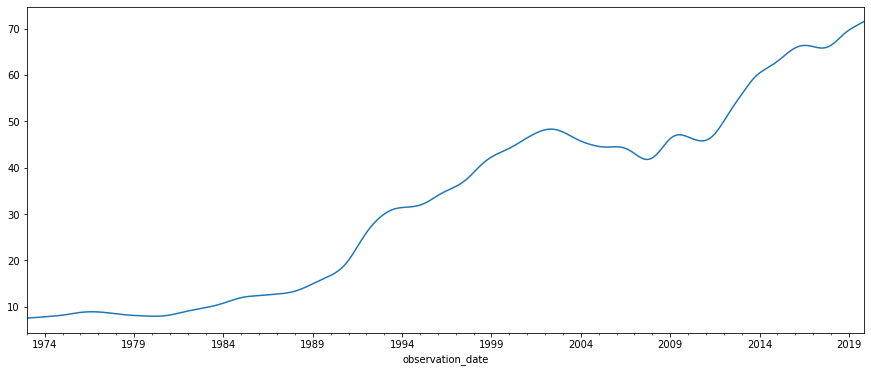

In [ ]:
import matplotlib as plt

%matplotlib inline 

from statsmodels.tsa.filters.hp_filter import hpfilter 

df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True) 

EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600) 

EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True) 

Detrending using Pandas Differencing

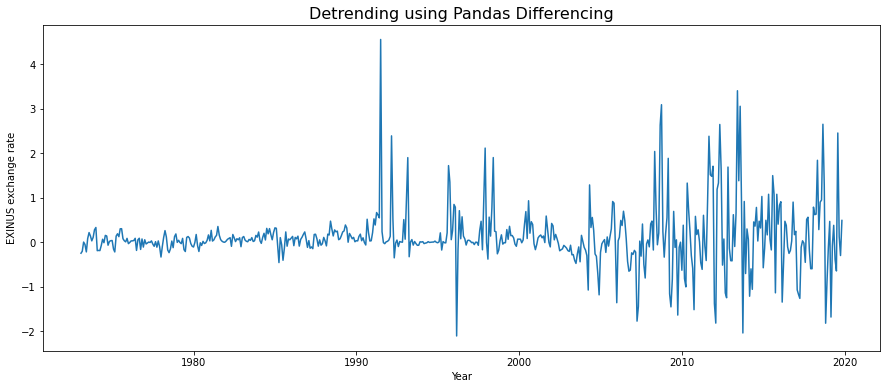

In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt  

import warnings 

warnings.filterwarnings("ignore") 

%matplotlib inline 

df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True) 

diff = df.EXINUS.diff() 

plt.figure(figsize=(15,6)) 

plt.plot(diff) 

plt.title('Detrending using Pandas Differencing', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('EXINUS exchange rate') 

plt.show() 


Detrending using SciPy Signal

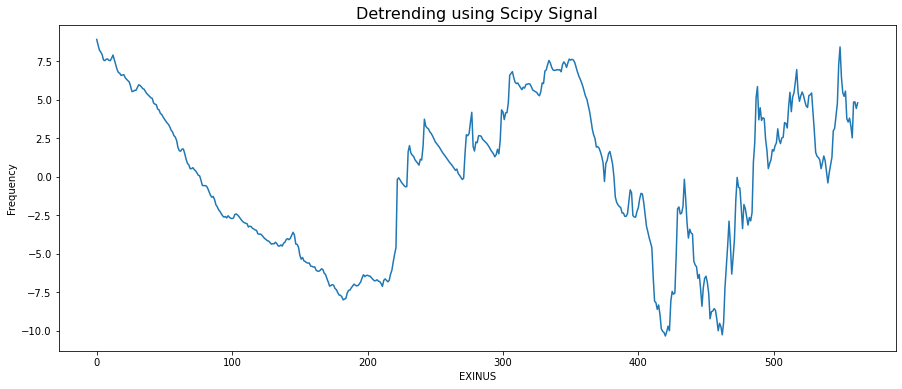

In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt  

from scipy import signal 

import warnings 

warnings.filterwarnings("ignore") 

%matplotlib inline 

df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True) 

detrended = signal.detrend(df.EXINUS.values) 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.xlabel('EXINUS') 

plt.ylabel('Frequency') 

plt.title('Detrending using Scipy Signal', fontsize=16) 

plt.show() 

Detrending using HP filter

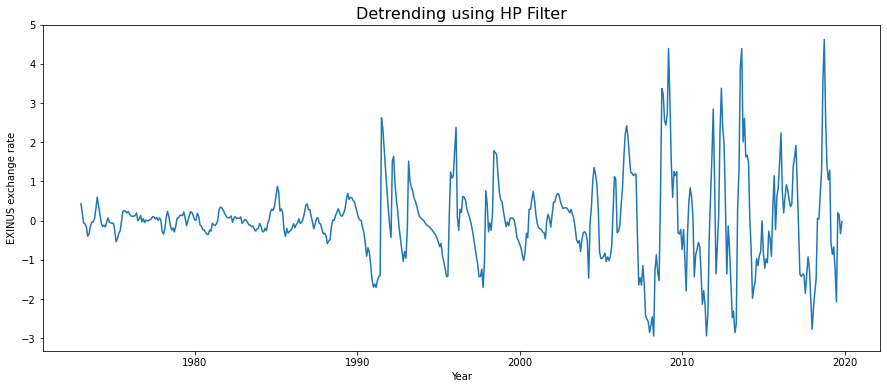

In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt  

from statsmodels.tsa.filters.hp_filter import hpfilter 

import warnings 

warnings.filterwarnings("ignore") 

%matplotlib inline 

df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True) 

EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600) 

df['trend'] = EXINUS_trend 

detrended = df.EXINUS - df['trend'] 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.title('Detrending using HP Filter', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('EXINUS exchange rate') 

plt.show() 

# Shampoo Dataset

Detecting Trend Using a Hodrick-Prescott Filter

In [ ]:
df

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


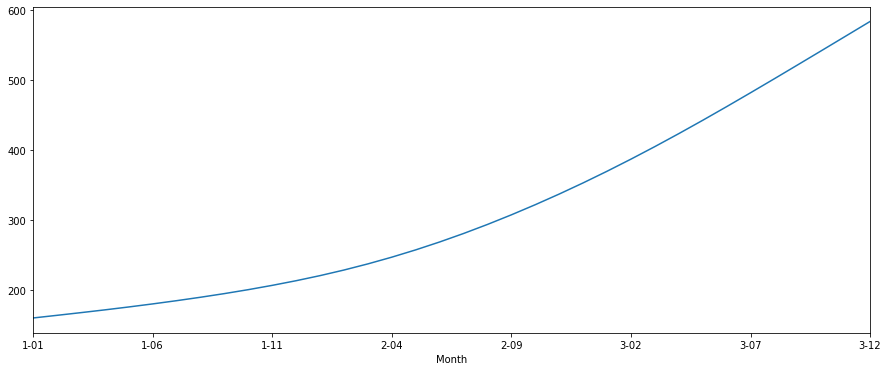

In [ ]:
import pandas as pd 

%matplotlib inline 

from statsmodels.tsa.filters.hp_filter import hpfilter 

df = pd.read_csv(r'/content/shampoo.csv', index_col=0,parse_dates=True) 

Sales_cycle,Sales_trend = hpfilter(df['Sales'], lamb=1600) 

Sales_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True) 


Detrending using Pandas Differencing

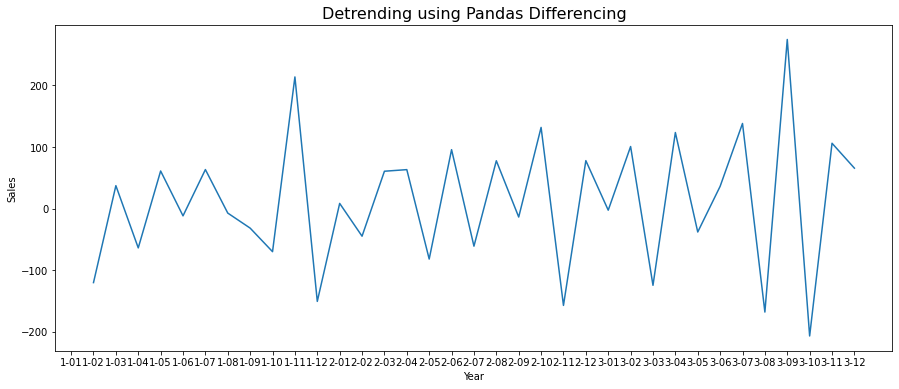

In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt  

import warnings 

warnings.filterwarnings("ignore") 

%matplotlib inline 

diff = df.Sales.diff() 

plt.figure(figsize=(15,6)) 

plt.plot(diff) 

plt.title('Detrending using Pandas Differencing', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('Sales') 

plt.show() 

Detrending using SciPy Signal

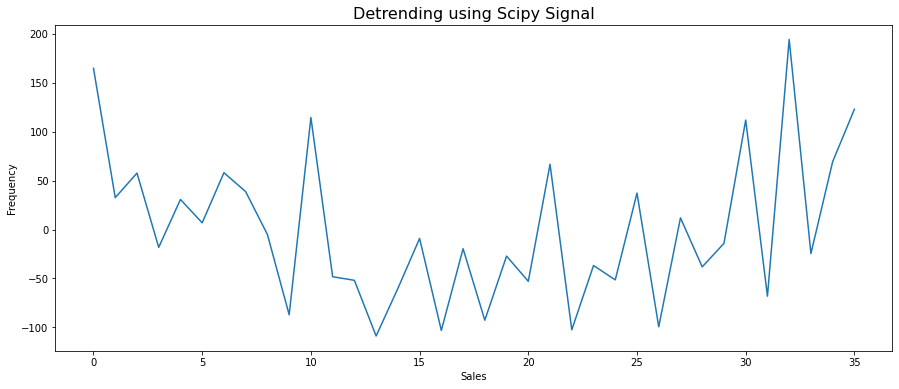

In [ ]:
detrended = signal.detrend(df.Sales.values) 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.xlabel('Sales') 

plt.ylabel('Frequency') 

plt.title('Detrending using Scipy Signal', fontsize=16) 

plt.show() 

Detrending using HP Filter: 

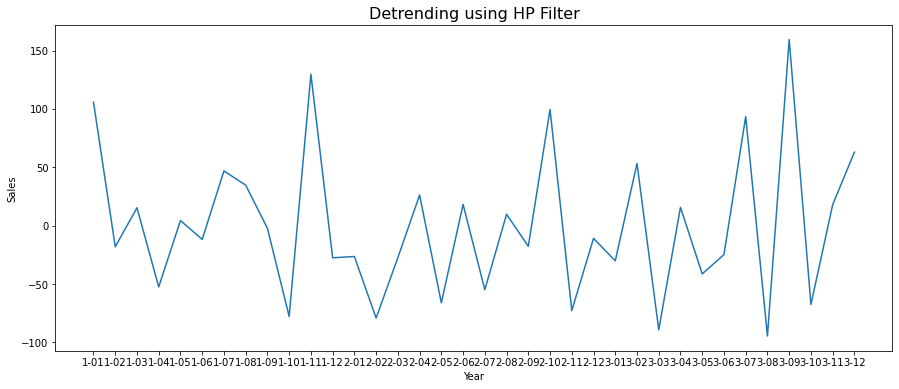

In [ ]:
Sales_cycle,Sales_trend = hpfilter(df['Sales'], lamb=1600) 

df['trend'] = Sales_trend 

detrended = df.Sales - df['trend'] 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.title('Detrending using HP Filter', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('Sales') 

plt.show() 

# ADANIPORTS stock price


In [ ]:
df = pd.read_csv('/content/ADANIPORTS.NS.csv', index_col=0,parse_dates=True)
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-11-27,154.000000,207.000000,154.000000,191.800003,177.675140,27262365.0
2007-11-28,194.000000,197.800003,174.929993,177.000000,163.965057,21958915.0
2007-11-29,181.000000,182.800003,168.460007,177.399994,164.335602,25616715.0
2007-11-30,178.000000,191.399994,178.000000,185.800003,172.117004,23047035.0
2007-12-03,187.949997,198.860001,184.399994,196.000000,181.565826,14578850.0
...,...,...,...,...,...,...
2021-07-27,682.799988,686.299988,660.349976,663.200012,663.200012,7133113.0
2021-07-28,668.400024,676.750000,654.200012,665.400024,665.400024,11132158.0
2021-07-29,671.000000,671.000000,657.950012,659.650024,659.650024,4572153.0


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
data

,Close
Date,
2007-11-27,191.800003
2007-11-28,177.000000
2007-11-29,177.399994
2007-11-30,185.800003
2007-12-03,196.000000
...,...
2021-07-27,663.200012
2021-07-28,665.400024
2021-07-29,659.650024


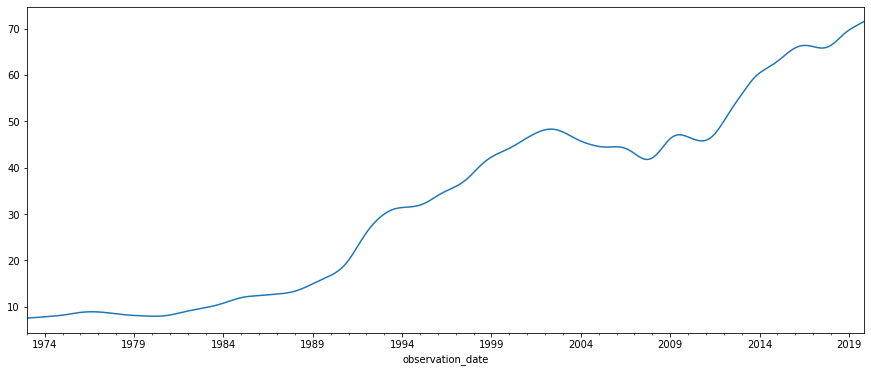

In [ ]:
import pandas as pd 

%matplotlib inline 

from statsmodels.tsa.filters.hp_filter import hpfilter  

Stock_cycle,Stock_trend = hpfilter(data['Close'], lamb=1600) 

EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True) 

Detrending using Pandas Differencing

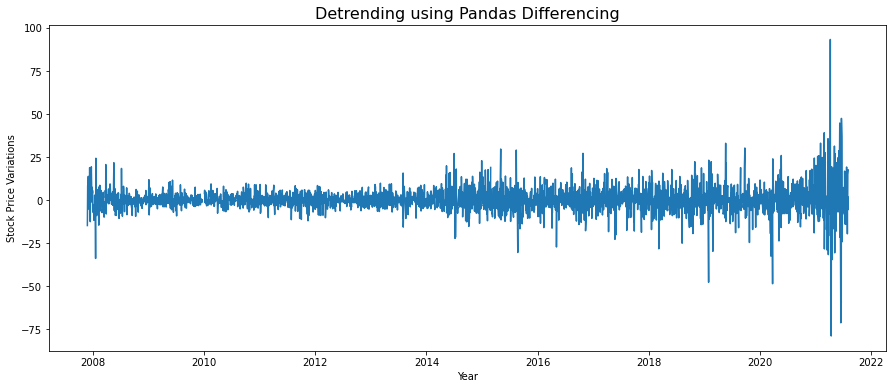

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt  
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline 

diff = data.Close.diff() 

plt.figure(figsize=(15,6)) 

plt.plot(diff) 

plt.title('Detrending using Pandas Differencing', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('Stock Price Variations') 

plt.show() 


Detrending using SciPy Signal: 

In [ ]:
#Dropping null values as their count is very less as compared to the whole data
data.isnull().sum()
data = data.dropna()

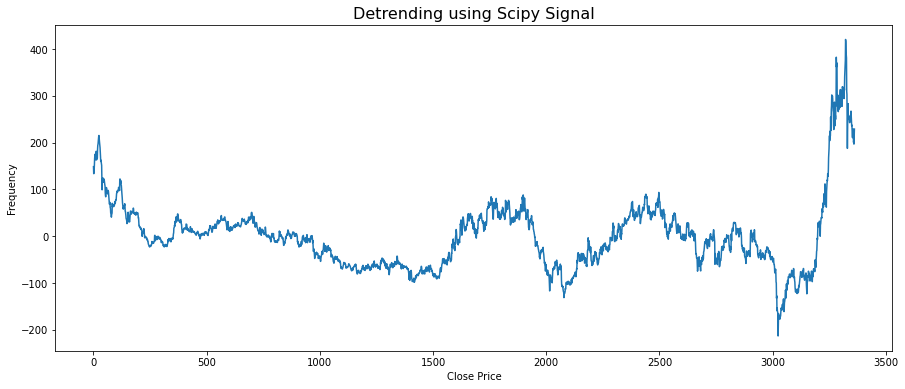

In [ ]:
detrended = signal.detrend(data.Close.values) 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.xlabel('Close Price') 

plt.ylabel('Frequency') 

plt.title('Detrending using Scipy Signal', fontsize=16) 

plt.show() 

Detrending using HP Filter: 

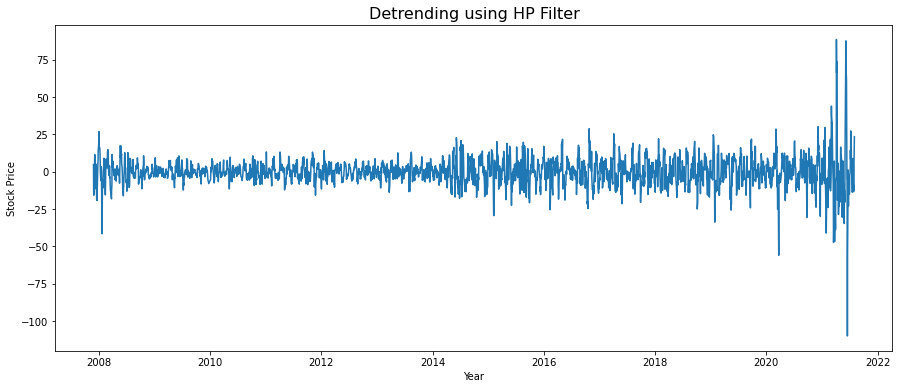

In [ ]:
Stock_cycle,Stock_trend = hpfilter(data['Close'], lamb=1600) 

data['trend'] = Stock_trend 

detrended = data.Close - data['trend'] 

plt.figure(figsize=(15,6)) 

plt.plot(detrended) 

plt.title('Detrending using HP Filter', fontsize=16) 

plt.xlabel('Year') 

plt.ylabel('Stock Price Variations') 

plt.show() 